In [3]:
path = "C:/Users/sam/Desktop/EDA/"

In [27]:
import pandas
import os
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pandas.read_csv(os.path.join(path, "zomato.csv"), encoding="latin-1")

In [8]:
print(df.columns.tolist())
print(df.shape)
print(df.head(5))

['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
(9551, 21)
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 G

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [11]:
country = pandas.read_excel(os.path.join(path, "Country-Code.xlsx"))

In [12]:
country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [13]:
df = pandas.merge(df, country, on="Country Code", how="left").reset_index(drop=True)

In [16]:
df.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [17]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [18]:
country_names = df["Country"].value_counts().index
country_counts = df["Country"].value_counts().values

([<matplotlib.patches.Wedge at 0x2184416bca0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

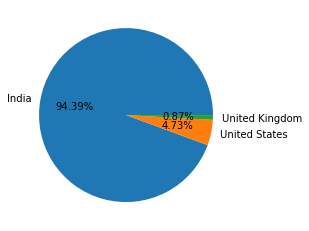

In [21]:
plt.pie(country_counts[:3], labels=country_names[:3], autopct="%1.2f%%") # Taking top three else pie looks ugly

In [ ]:
# From this dataset, we see that India has most transactions/records.

In [26]:
grouped = df.groupby(["Aggregate rating", "Rating color", "Rating text"]).size().reset_index().rename(columns={0: "Count"})
print(grouped)

    Aggregate rating Rating color Rating text  Count
0                0.0        White   Not rated   2148
1                1.8          Red        Poor      1
2                1.9          Red        Poor      2
3                2.0          Red        Poor      7
4                2.1          Red        Poor     15
5                2.2          Red        Poor     27
6                2.3          Red        Poor     47
7                2.4          Red        Poor     87
8                2.5       Orange     Average    110
9                2.6       Orange     Average    191
10               2.7       Orange     Average    250
11               2.8       Orange     Average    315
12               2.9       Orange     Average    381
13               3.0       Orange     Average    468
14               3.1       Orange     Average    519
15               3.2       Orange     Average    522
16               3.3       Orange     Average    483
17               3.4       Orange     Average 

<AxesSubplot:xlabel='Aggregate rating', ylabel='Count'>

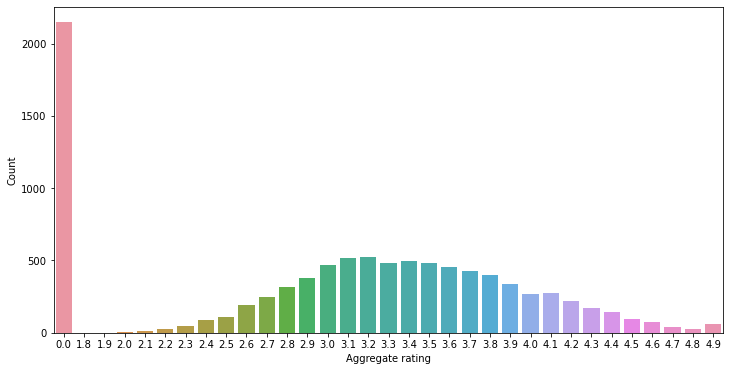

In [29]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating", y="Count", data=grouped)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Count'>

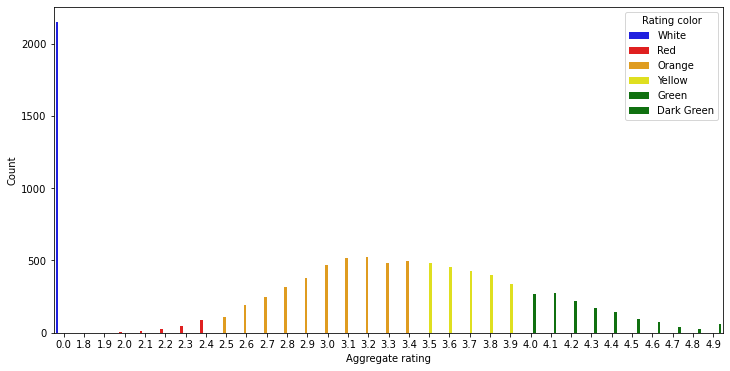

In [32]:
# Matching color to Rating color as hue did not create an exact match
# using blue for white as white is not seen
sns.barplot(x="Aggregate rating", y="Count", data=grouped, hue="Rating color", palette=['blue', 'red', 'orange', 'yellow', 'green', 'green'])

In [ ]:
# 0 - 2.4 --> Poor
# 2.5 - 3.4 --> Average
# 3.5 - 3.9 --> Good
# 4 - 4.4 --> Very Good
# 4.5 - 4.9 --> Excellent
# From the data, max people have not rated.
# Max observations are between 2.5 - 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

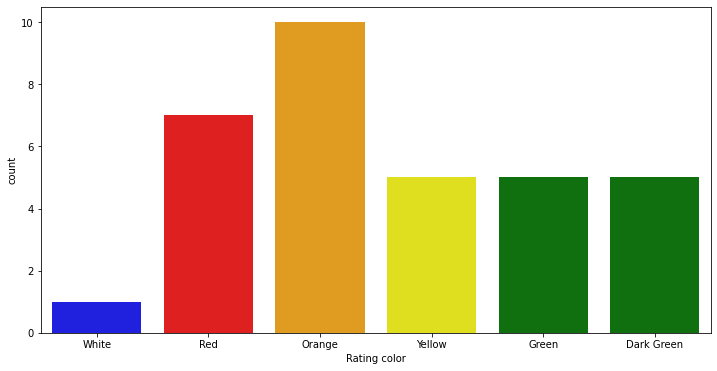

In [33]:
# Count plot
sns.countplot(x="Rating color", data=grouped, palette=['blue', 'red', 'orange', 'yellow', 'green', 'green'])

In [43]:
zero_rating_countries = df[df["Rating color"] == "White"].groupby(["Rating color", "Country"]).size().reset_index()
print(zero_rating_countries)

  Rating color         Country     0
0        White          Brazil     5
1        White           India  2139
2        White  United Kingdom     1
3        White   United States     3


In [44]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [54]:
currency = df.groupby(["Country", "Currency"]).size().reset_index()
print(currency)

           Country                Currency     0
0        Australia               Dollar($)    24
1           Brazil      Brazilian Real(R$)    60
2           Canada               Dollar($)     4
3            India      Indian Rupees(Rs.)  8652
4        Indonesia  Indonesian Rupiah(IDR)    21
5      New Zealand           NewZealand($)    40
6      Phillipines        Botswana Pula(P)    22
7            Qatar         Qatari Rial(QR)    20
8        Singapore               Dollar($)    20
9     South Africa                 Rand(R)    60
10       Sri Lanka   Sri Lankan Rupee(LKR)    20
11          Turkey        Turkish Lira(TL)    34
12             UAE      Emirati Diram(AED)    60
13  United Kingdom              Pounds(£)    80
14   United States               Dollar($)   434


In [57]:
online_delivery = df.groupby(["Country", "Has Online delivery"]).size().reset_index()
print(online_delivery)

           Country Has Online delivery     0
0        Australia                  No    24
1           Brazil                  No    60
2           Canada                  No     4
3            India                  No  6229
4            India                 Yes  2423
5        Indonesia                  No    21
6      New Zealand                  No    40
7      Phillipines                  No    22
8            Qatar                  No    20
9        Singapore                  No    20
10    South Africa                  No    60
11       Sri Lanka                  No    20
12          Turkey                  No    34
13             UAE                  No    32
14             UAE                 Yes    28
15  United Kingdom                  No    80
16   United States                  No   434


In [58]:
# Online deliveries are available only in India and UAE
# Certain regions have no delivery in India as well

In [60]:
city_names = df["City"].value_counts().index
city_counts = df["City"].value_counts().values

([<matplotlib.patches.Wedge at 0x218482504f0>,
 [Text(-0.5885541119444019, 0.9293029954290133, 'New Delhi'),
  Text(-0.006008322137253758, -1.099983590816288, 'Gurgaon'),
  Text(0.8279428936915272, -0.7242310161721195, 'Noida'),
  Text(1.0782100088727444, -0.21786045250718752, 'Faridabad'),
  Text(1.0953795414972105, -0.10071573893568578, 'Ghaziabad'),
  Text(1.097010627021975, -0.08104124999562284, 'Lucknow'),
  Text(1.0981912920377443, -0.06305462784340321, 'Amritsar'),
  Text(1.0990770676906627, -0.04505107408813379, 'Guwahati'),
  Text(1.0996677161298025, -0.027035423093857848, 'Bhubaneshwar'),
  Text(1.0999630787526116, -0.00901251247300567, 'Ahmedabad')],
 [Text(-0.3210295156060373, 0.50689254296128, '67.97%'),
  Text(-0.003277266620320231, -0.5999910495361571, '13.88%'),
  Text(0.4516052147408329, -0.3950350997302469, '13.41%'),
  Text(0.5881145502942242, -0.11883297409482954, '3.12%'),
  Text(0.5974797499075692, -0.054935857601283146, '0.31%'),
  Text(0.5983694329210772, -0.044

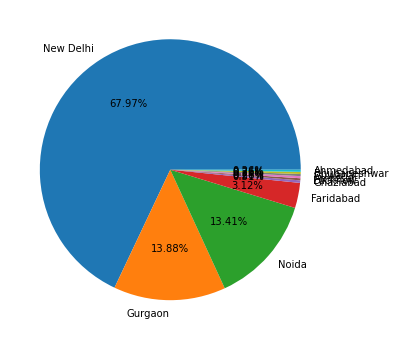

In [62]:
plt.pie(city_counts[:10], labels=city_names[:10], autopct="%1.2f%%") # Taking top 10 else pie looks ugly

In [64]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [67]:
df["Cuisines"].value_counts()

North Indian                                         936
North Indian, Chinese                                511
Chinese                                              354
Fast Food                                            354
North Indian, Mughlai                                334
                                                    ... 
Cafe, Pizza, Burger                                    1
Latin American, Italian                                1
Korean, Japanese, Chinese, Asian                       1
Continental, Mediterranean, Italian, North Indian      1
North Indian, Continental, Lebanese                    1
Name: Cuisines, Length: 1825, dtype: int64

In [66]:
top_cuisines = df.groupby(["Cuisines"]).size().reset_index()
print(top_cuisines)

                                       Cuisines  0
0                                       Afghani  4
1                     Afghani, Mughlai, Chinese  1
2                         Afghani, North Indian  1
3     Afghani, North Indian, Pakistani, Arabian  1
4                                       African  1
...                                         ... ..
1820                       Western, Asian, Cafe  1
1821                 Western, Fusion, Fast Food  1
1822                              World Cuisine  1
1823            World Cuisine, Mexican, Italian  1
1824            World Cuisine, Patisserie, Cafe  1

[1825 rows x 2 columns]
